###Installing and importing necessary libraries

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=7e001cf4b518c96793b67cd23a7d7c3aa5442dbee9f7c7fd6086b82e7d7affc6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

###Antecedents and Consequent

In [8]:
surface = ctrl.Antecedent(np.arange(0,6,1),'surface')
dirt = ctrl.Antecedent(np.arange(0,6,1),'dirt')

In [9]:
surface.universe, dirt.universe

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [10]:
suction = ctrl.Consequent(np.arange(0,11,1), 'suction')
suction.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

###Membership Functions

In [11]:
surface.automf(number = 3, names=['easy', 'moderate', 'hard'])
dirt.automf(number = 3, names=['light', 'moderate', 'heavy'])

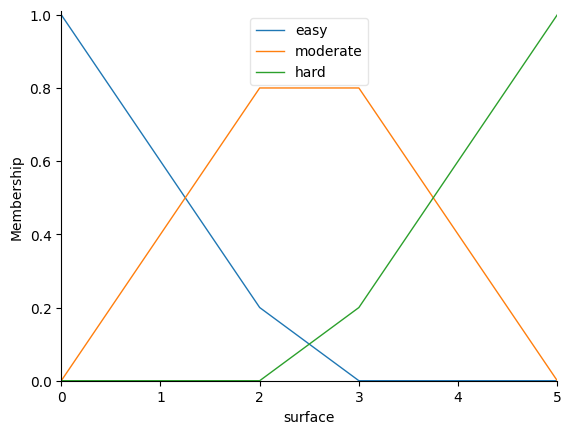

In [12]:
surface.view()

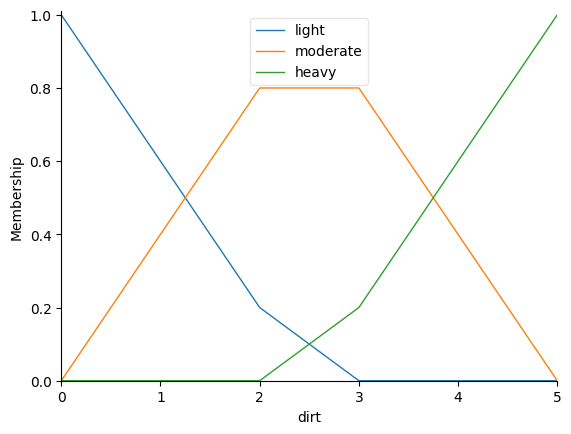

In [13]:
dirt.view()

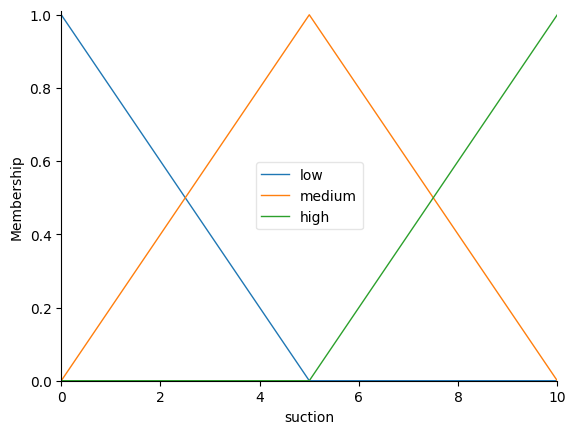

In [14]:
suction['low'] = fuzz.trimf(suction.universe, [0,0,5])
suction['medium'] = fuzz.trimf(suction.universe,[0,5,10])
suction['high'] = fuzz.trimf(suction.universe, [5,10,10])
suction.view()

###Rules

In [15]:
rule1 = ctrl.Rule(surface['easy'] & dirt['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] & dirt['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirt['heavy'], suction['high'])

###Control System

In [16]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

In [17]:
fuzzy_system.input['surface'] = 4.5
fuzzy_system.input['dirt'] = 3.5
fuzzy_system.compute()

8.277777777777777


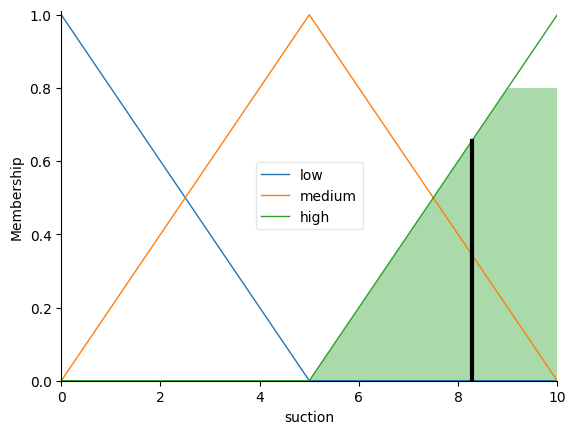

In [18]:
print(fuzzy_system.output['suction'])
suction.view(sim=fuzzy_system)

In [21]:
# !pip install scikit-fuzzy
# import numpy as np
# import skfuzzy as fuzz
# from skfuzzy import control as ctrl

In [20]:
# surface = ctrl.Antecedent(np.arange(0,6,1), 'surface')
# dirt = ctrl.Antecedent(np.arange(0,6,1), 'dirt')
# suction = ctrl.Consequent(np.arange(0,11,1), 'suction')

# surface.automf(number = 3, names=['easy','moderate','hard'])
# dirt.automf(number = 3, names=['light','moderate','heavy'])

# surface.view()
# dirt.view()

# suction['low'] = fuzz.trimf(suction.universe, [0,0,5])
# suction['medium'] = fuzz.trimf(suction.universe, [0,5,10])
# suction['high'] = fuzz.trimf(suction.universe, [5,10,10])

# suction.view()

# rule1 = ctrl.Rule(surface['easy'] & dirt['light'], suction['low'])
# rule2 = ctrl.Rule(surface['moderate'] & dirt['light'], suction['medium'])
# rule3 = ctrl.Rule(surface['hard'] & dirt['heavy'], suction['high'])

# control_system = ctrl.ControlSystem([rule1,rule2,rule3])
# fuzz_system = ctrl.ControlSystemSimulation(control_system)

# fuzz_system.input['surface'] = 3.3
# fuzz_system.input['dirt'] = 2.7
# fuzz_system.compute()

# print(fuzz_system.output['suction'])
# suction.view(sim=fuzz_system)

###Hard Fuzzy

In [3]:
#Antecedents and Consequent

surface = np.arange(0,6,1)
dirt = np.arange(0,6,1)
suction = np.arange(0,11,1)

surface_easy = fuzz.trimf(surface,[0,0,2.5])
surface_moderate = fuzz.trimf(surface,[0,2.5,5])
surface_hard = fuzz.trimf(surface,[2.5,5,5])

dirt_light = fuzz.trimf(dirt,[0,0,2.5])
dirt_moderate = fuzz.trimf(dirt,[0,2.5,5])
dirt_heavy = fuzz.trimf(dirt,[2.5,5,5])

suction_low = fuzz.trimf(suction,[0,0,5])
suction_medium = fuzz.trimf(suction,[0,5,10])
suction_high = fuzz.trimf(suction,[5,10,10])

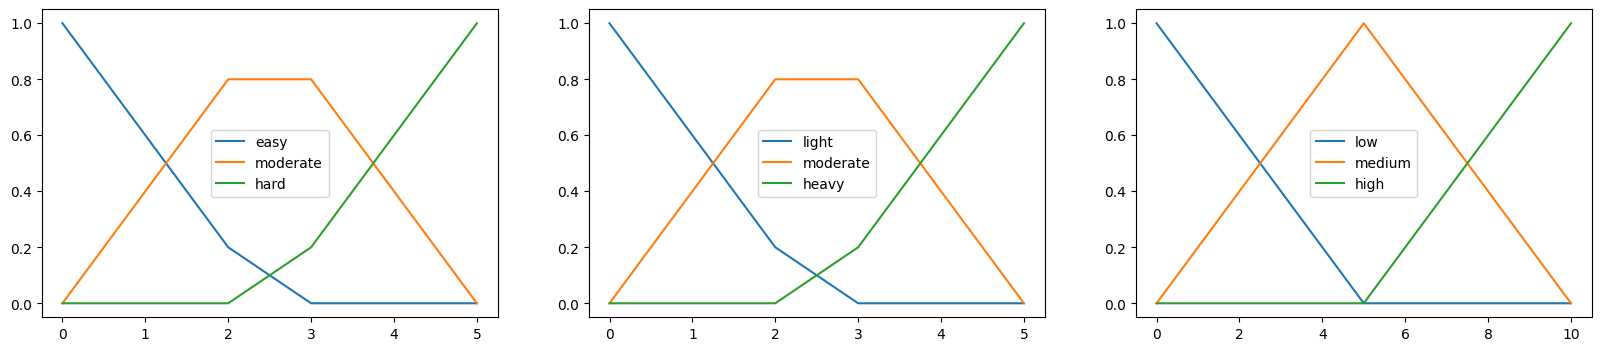

In [20]:
#Plotting Antecedents and Consequents

fig, axes = plt.subplots(1,3, figsize=(20,4))

axes[0].plot(surface, surface_easy, label='easy')
axes[0].plot(surface, surface_moderate, label='moderate')
axes[0].plot(surface, surface_hard, label='hard')
axes[0].legend()

axes[1].plot(dirt, dirt_light, label='light')
axes[1].plot(dirt, dirt_moderate, label='moderate')
axes[1].plot(dirt, dirt_heavy, label='heavy')
axes[1].legend()

axes[2].plot(suction, suction_low, label='low')
axes[2].plot(suction, suction_medium, label='medium')
axes[2].plot(suction, suction_high, label='high')
axes[2].legend()

In [35]:
def get_output(surface_value, dirt_value):

  #Membership functions

  surface_grade_easy = fuzz.interp_membership(surface, surface_easy, surface_value)
  surface_grade_moderate = fuzz.interp_membership(surface, surface_moderate, surface_value)
  surface_grade_hard = fuzz.interp_membership(surface, surface_hard, surface_value)

  dirt_grade_light = fuzz.interp_membership(dirt, dirt_light, dirt_value)
  dirt_grade_moderate = fuzz.interp_membership(dirt, dirt_moderate, dirt_value)
  dirt_grade_heavy = fuzz.interp_membership(dirt, dirt_heavy, dirt_value)

  #Rules
  # 1.Surface -> easy and dirt -> light, then suction -> low
  # 2.Surface -> moderate and dirt -> light, then suction -> medium
  # 3.Surface -> hard and dirt -> heavy, then suction -> high

  rule1 = np.fmax(surface_grade_easy, dirt_grade_light)
  rule2 = np.fmax(surface_grade_moderate, dirt_grade_light)
  rule3 = np.fmax(surface_grade_hard, dirt_grade_heavy)

  activate_suction_low = np.fmin(rule1, suction_low)
  activate_suction_medium = np.fmin(rule2, suction_medium)
  activate_suction_high = np.fmin(rule3, suction_high)

  control = np.fmax(activate_suction_low, np.fmax(activate_suction_medium, activate_suction_high))
  output = fuzz.defuzz(suction, control, 'centroid')

  #Plotting results

  suction0 = np.zeros_like(suction)

  fig, axes = plt.subplots(1,2, figsize=(12,4))
  axes[0].fill_between(suction, suction0, activate_suction_low)
  axes[0].plot(suction, suction_low, label='low')
  axes[0].fill_between(suction, suction0, activate_suction_medium)
  axes[0].plot(suction, suction_medium, label='medium')
  axes[0].fill_between(suction, suction0, activate_suction_high)
  axes[0].plot(suction, suction_high, label='high')
  axes[0].legend()

  suction_activation = fuzz.interp_membership(suction, control, output)
  axes[1].plot(suction, suction_low)
  axes[1].plot(suction, suction_medium)
  axes[1].plot(suction, suction_high)
  # axes[1].plot(suction, control, label='suction')
  axes[1].fill_between(suction, suction0, control, facecolor='purple')
  axes[1].plot([output,output], [0, suction_activation], 'black', label='Suction Power')
  axes[1].legend()

  return output

Enter surface value (0-5): 5
Enter dirt value (0-5): 2
Required suction power: 6.62962962962963


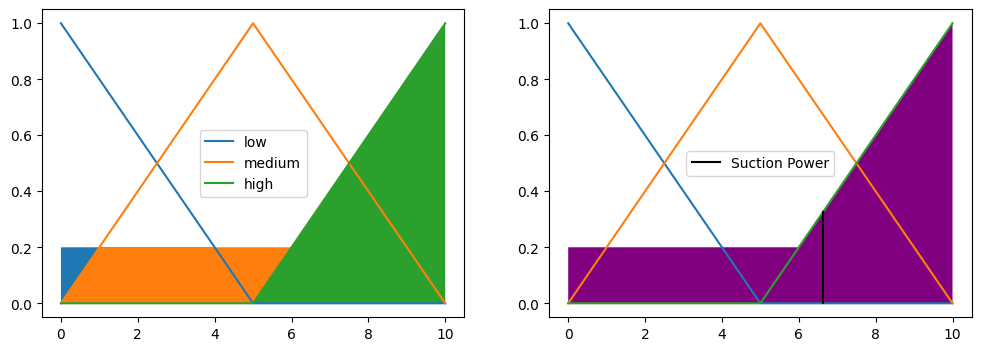

In [36]:
surface_value = float(input("Enter surface value (0-5): "))
dirt_value = float(input("Enter dirt value (0-5): "))
result = get_output(surface_value, dirt_value)
print(f"Required suction power: {result}")